### Import & Read

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Cleaning & Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Detecting & Handling Missing Values

In [5]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Detecting & Handling Duplicated Value

In [7]:
data.duplicated().any()

False

### Exploratory Data Analysis

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.shape

(200, 5)

In [10]:
for column in data.columns:
    print('Count unique data of {} : {}'.format(column, data[column].nunique()))

Count unique data of CustomerID : 200
Count unique data of Gender : 2
Count unique data of Age : 51
Count unique data of Annual Income (k$) : 64
Count unique data of Spending Score (1-100) : 84


<AxesSubplot:>

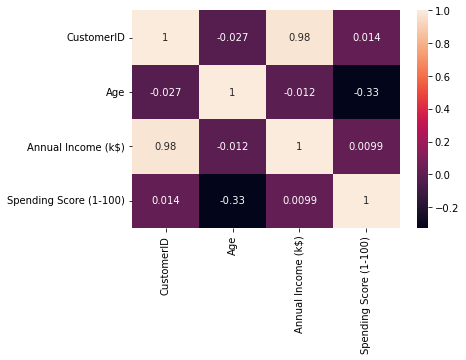

In [11]:
sns.heatmap(data.corr(),annot=True)

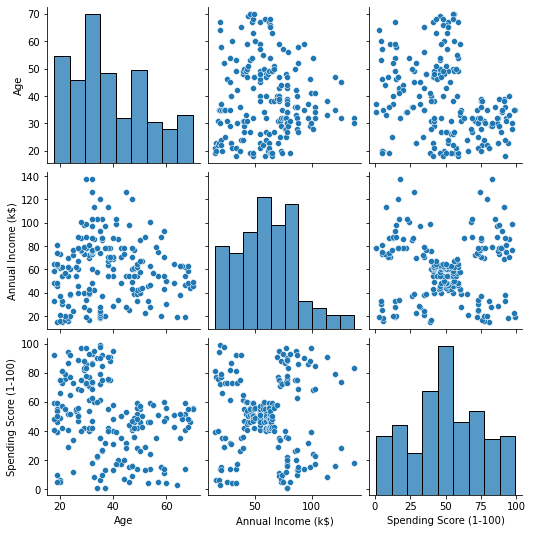

In [12]:
sns.pairplot(data.drop(labels=['CustomerID'],axis=1))

### Data Preparation

In [13]:
data = data.iloc[:, [1, 2, 3, 4]]

In [14]:
data['Gender'].replace('Male',1,inplace=True)
data['Gender'].replace('Female',0,inplace=True)

In [15]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Model & Evaluation

find optimal clusters

In [16]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,10))
dendogram = sch.dendrogram(sch.linkage(data.iloc[:,[1,2,3,4]],method='ward'))
plt.title('Dendogram',fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

IndexError: positional indexers are out-of-bounds

<Figure size 1800x720 with 0 Axes>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster = hc.fit_predict(data)

In [ ]:
cluster

In [ ]:
data['cluster'] = cluster

In [ ]:
data.head()

In [ ]:
result = data.groupby(['cluster']).agg({'Age':'mean','Annual Income (k$)':'mean','Spending Score (1-100)':'mean','Gender':'mean'})
result

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x="Annual Income (k$)",y="Spending Score (1-100)",hue="cluster",palette='tab10')